# 911 Calls

In [ ]:
#lets perform exploratory analysis on the 911 calls and  find trends in the dataset

 Analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [ ]:
# Data and Setup

In [436]:
# Import numpy and pandas

In [437]:
import numpy as np
import pandas as pd
import seaborn as sns

In [438]:
import matplotlib.pyplot as plt
%matplotlib inline

In [439]:
#Read the csv file as a dataframe called df

In [440]:
df = pd.read_csv('911.csv')

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [442]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [443]:
#EXPLORATORY ANALYSIS 

In [444]:
#What are the top 5 zipcodes for 911 calls? 

In [445]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [446]:
#What are the top 5 townships (twp) for 911 calls? 

In [447]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [448]:
# how many unique title codes are there?  

In [449]:
len(df['title'].unique())

110

In [450]:
#Creating new features

In [451]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [452]:
#In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.
# create a new column called "Reason" that contains this string value 
 
#For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS 

In [453]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])

In [454]:
#another way to do above operation 

In [455]:
Reason=[]
for n in range(len(df['title'])):
    Reasons = df['title'][n].split(':')
    Reason.append(Reasons[0])
Reason
df['Reason'] = Reason
 

In [456]:
# most common Reason for a 911 call based off of this new column 

In [457]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#using seaborn to create a countplot of 911 calls by Reason 

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

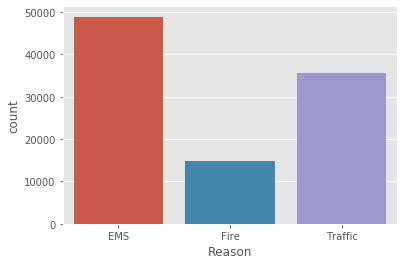

In [459]:
sns.countplot(x=df['Reason'], data= df)

In [395]:
#lets begin to focus on time information,the data type of the objects in the timeStamp column are strings
# Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) 
#to convert the column from strings to DateTime objects 

In [460]:
type(df['timeStamp'].iloc[0]) 

str

In [461]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'] )

In [462]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [463]:
# Now that the timestamp column are actually DateTime objects,
# create 3 new columns called Hour, Month, and Day of Week. 

In [464]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour ) 

In [465]:
df['second']= df['timeStamp'].apply(lambda time: time.second)

In [466]:
df['minute']= df['timeStamp'].apply(lambda time: time.minute)

In [467]:
df['day_of_week']= df['timeStamp'].apply(lambda time: time.dayofweek)

In [468]:
df['month']= df['timeStamp'].apply(lambda time: time.month)

In [469]:
df['day_of_week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [470]:
df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [471]:
# map the actual string names to the day of the week 

In [472]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [473]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [474]:
df['day_of_week'] = df['day_of_week'].map(dmap)

In [475]:
df['day_of_week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day_of_week, Length: 99492, dtype: object

In [476]:
#check the  trends for  weekly and monthly cases based on reasons

In [477]:
# create a countplot of the Day of Week column with the hue based off of the Reason column. **

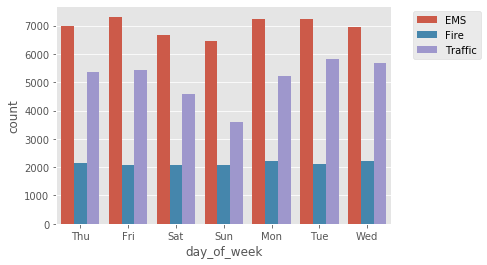

In [478]:
sns.countplot(x=df['day_of_week'], data= df, hue=df['Reason'] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

In [90]:
len(df['month']) 

99492

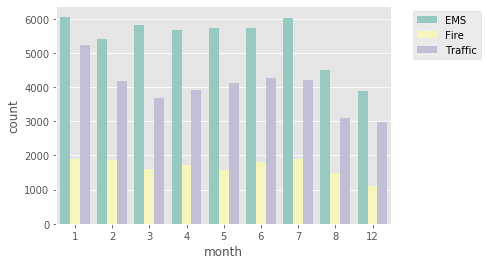

In [479]:
sns.countplot(x=df['month'], data= df, hue=df['Reason'], palette ='Set3')  
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

In [480]:
# some Months are missing  
#let's see if we can maybe fill in this information by plotting the information in another way,
#possibly a simple line plot that fills in the missing months
# in order to do this, we'll need to do some work with pandas... **

In [481]:
byMonth = df.groupby('month')

In [482]:
byMonth =byMonth.count() 

In [483]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,second,minute,day_of_week
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [484]:
 byMonth['twp']

month
1     13203
2     11465
3     11092
4     11323
5     11420
6     11777
7     12133
8      9073
12     7963
Name: twp, dtype: int64

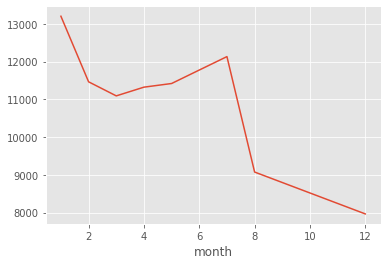

In [485]:
byMonth['twp'].plot()

In [486]:
# create a simple plot off of the dataframe indicating the count of calls per month. 

In [487]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,second,minute,day_of_week
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [488]:
mnth_values = byMonth.reset_index()

In [489]:
# using seaborn's lmplot() to create a linear fit on the number of calls per month. 

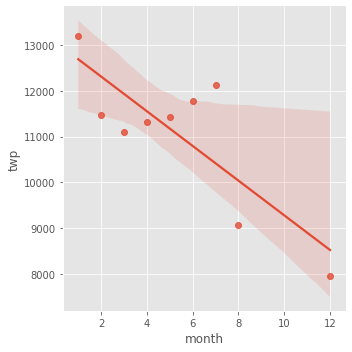

In [490]:
sns.lmplot(x= 'month' ,y= 'twp' , data= byMonth.reset_index())

In [491]:
# Create a new column called 'Date' that contains the date from the timeStamp column.

In [492]:
df['date'] = df['timeStamp'].apply(lambda d: d.date())
date[0]

datetime.date(2015, 12, 10)

In [493]:
df.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,second,minute,day_of_week,month
date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389,389


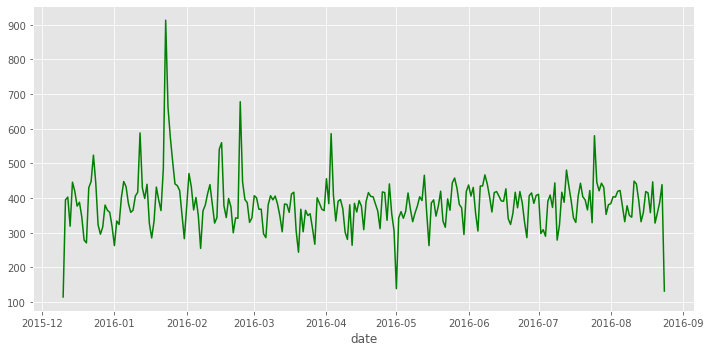

In [494]:
plt.figure(figsize=(10,5))
df.groupby('date').count()['twp'].plot(color = 'green')
plt.tight_layout()

In [ ]:
# create 3 separate plots with each plot representing a Reason for the 911 call  

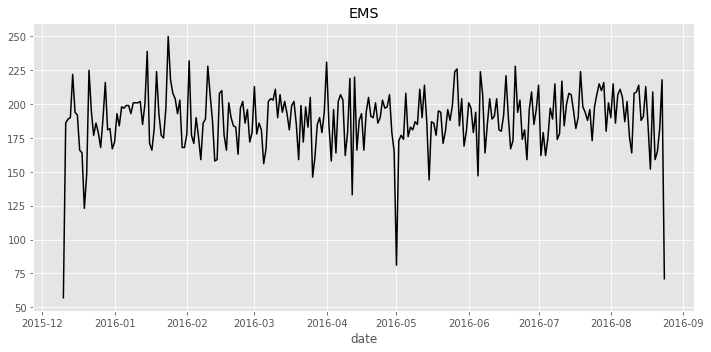

In [495]:
plt.figure(figsize=(10,5))
df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot(color = 'black')
plt.title('EMS')
plt.tight_layout()

Text(0.5, 1, 'Traffic')

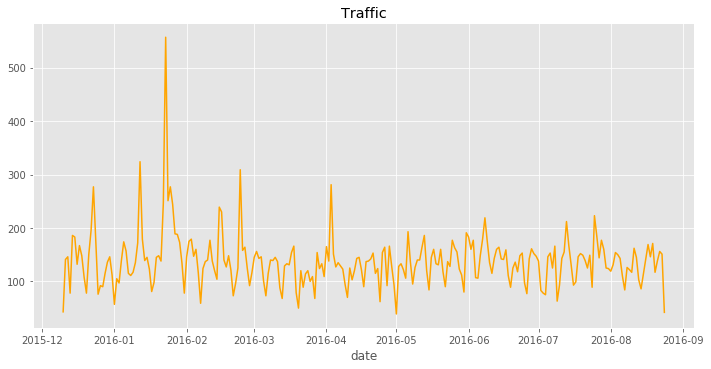

In [501]:
plt.figure(figsize =(10,5))
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot(color= 'orange'  )
plt.tight_layout()
plt.title('Traffic')
 

Text(0.5, 1, 'Fire')

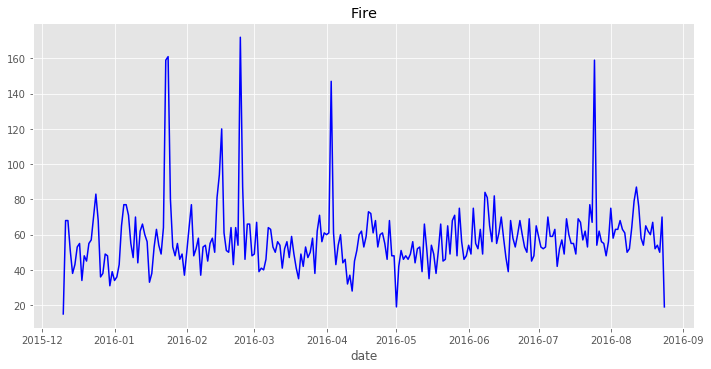

In [502]:
plt.figure(figsize =(10,5))
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot(color= 'blue'  )
plt.tight_layout()
plt.title('Fire')

In [497]:
X=df[df['Reason']=='Fire'].groupby('date').count().reset_index()
X

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,second,minute,day_of_week,month
0,2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15
1,2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69,69,69
2,2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68,68,68
3,2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51,51,51
4,2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52,52,52
255,2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54,54,54
256,2016-08-22,51,51,51,46,51,51,50,50,51,51,51,51,51,51,51
257,2016-08-23,70,70,70,62,70,70,70,70,70,70,70,70,70,70,70


In [498]:
#to access timedate columns 

In [499]:
 X[(X['date'].isin(pd.date_range(start = "2015-12-10",freq='D',periods=5)))] 

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,second,minute,day_of_week,month
0,2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15
4,2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39,39,39


In [ ]:
# creating  heatmaps with seaborn and our data.
#We'll first need to restructure the dataframe 
#so that the columns become the Hours and the Index becomes the Day of the Week.


In [341]:
Day_Hour = df.groupby(by = ['day_of_week','hour']).count()["Reason"].unstack()
Day_Hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


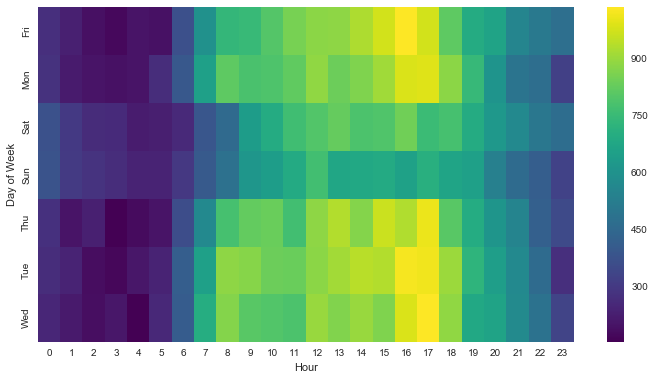

In [204]:
plt.figure(figsize=(80,40))
sns.heatmap(Day_Hour, annot =True, cmap ='viridis') 


** Now create a clustermap using this DataFrame. **

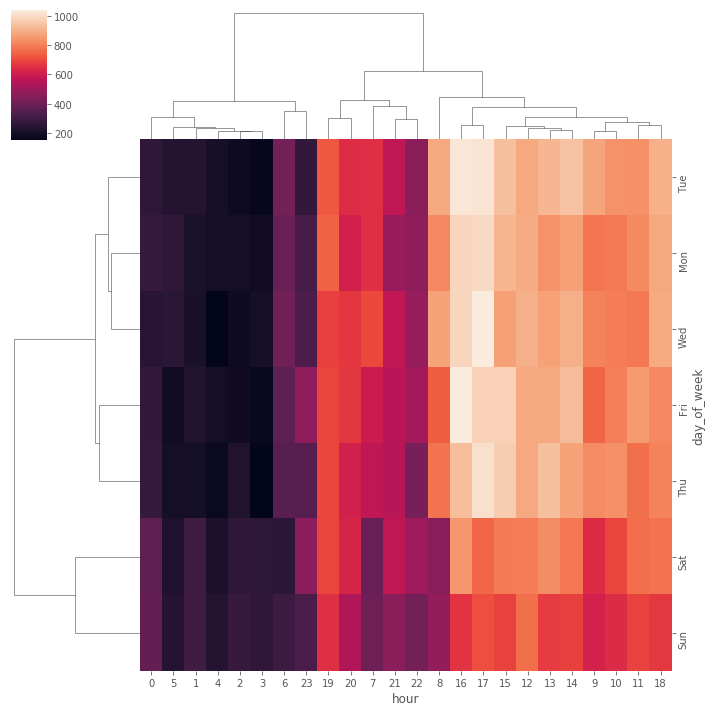

In [365]:
sns.clustermap(data = Day_Hour)

In [ ]:
# use same plots and operations, for a DataFrame that shows the Month as the column. **

In [374]:
day_month = df.groupby(by=['month','day_of_week']).count()['Reason'].unstack(level =0)
day_month

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


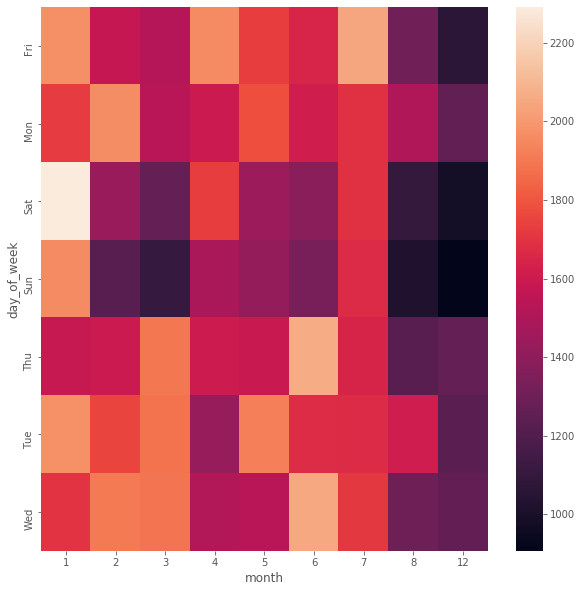

In [377]:
plt.figure(figsize=(10,10))
sns.heatmap(data = day_month)


<Figure size 720x720 with 0 Axes>

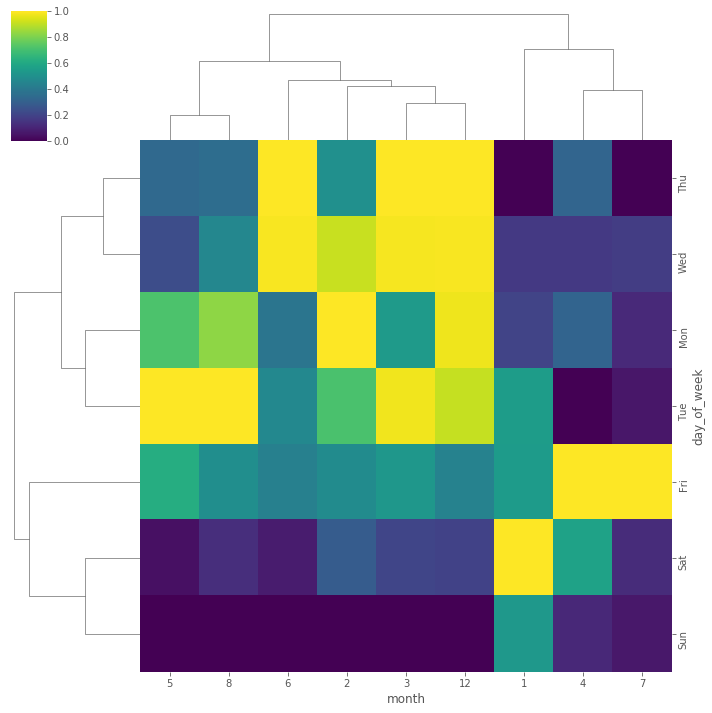

In [379]:
plt.figure(figsize=(10,10))
sns.clustermap(data = day_month,standard_scale=1,cmap='viridis')